# 전처리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

In [2]:
train_data = pd.read_csv('C:/localRepository/recipes_project/data/content_data.csv')
train_data.tail()

,url,title,ingredient
25014,6881127,팽드깡파뉴,"['[재료]', '강력분', '250g', '통밀가루', '50g', '소금', '..."
25015,6881126,"치즈 웨지감자, 노오븐","['[재료외]', '감자', '3개', '식용유', '넉넉히', '파슬리가루', '..."
25016,6881123,크리스마스 트리를 꼭 닮은 녹차딸기크레이프케이크♥,"['[크레이프반죽 재료]', '박력분', '200g', '녹차파우더', '15g',..."
25017,6881120,맛있는 연말 홈파티 메뉴는 바로! 한우볼&양송이한우구이♥,"['[필수 재료]', '소고기다짐육', '150g', '메추리알', '4개', '당..."
25018,6881119,"시금치나물 만드는법, 요즘시금치 맛있네요~","['[재료]', '시금치', '1봉', '굵은소금', '0.5T', '"


In [3]:
# 소금, 간장, 고추장 등 양념 재료 제거(주재료만 남김)
for i in range(len(train_data)):
  try:
    train_data['ingredient'][i] = train_data['ingredient'][i].split('[')[2]
  except:
    pass
train_data['ingredient'][147]

C:\Users\admin\AppData\Local\Temp\ipykernel_15844\151684240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ingredient'][i] = train_data['ingredient'][i].split('[')[2]


"기본재료]', '양배추', '2줌', '양파', '1/2개', '피망', '1/2개', '다진마늘', '1/2스푼', '베이컨', '3줄', '"

In [4]:
# 전체 데이터 개수 확인
len(train_data)

25019

In [5]:
# 데이터 결측치 확인
train_data.isnull().values.any()

False

In [6]:
# 정규식을 이용해 재료에서 한국어를 제외한 것은 삭제함(영어, 특수문자, 숫자 등 삭제)
train_data['ingredient'] = train_data['ingredient'].str.replace("[^ㄱ-힣\s]","")
train_data.sample(10)

C:\Users\admin\AppData\Local\Temp\ipykernel_15844\1722506968.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['ingredient'] = train_data['ingredient'].str.replace("[^ㄱ-힣\s]","")


,url,title,ingredient
3402,6983839,밥이나 찌개에 둬 먹기 좋은 채소 말리기,재료 주키니 적당량 당근 적당량 표고 버섯 적당량 가지 적당량 파프리카 적당량 양파...
10488,6976421,집에서 간단한 요리 토마토 스파게티 만들기,재료 토마토소스 컵 스파게티면 소금 큰술 올리브오일 큰술 베이컨 장 다진마늘 큰술...
75,6987289,아이들이 좋아하는 소고기 육전...,재료 소고기 육전용 팩 달걀 개 부침가루 컵 허브솔트 조금
1176,6986156,갈릭라이스 마늘 돼지고기 볶음밥 만드는 법,재료 밥 공기 돼지고기 다짐육 통마늘 개 양파 개 다진마늘 큰술 당근 굴소스 큰...
4420,6982781,캠핑국물 바지락요리 빨간 어묵탕/어묵조개탕,재료 어묵 바지락 개 표고버섯 개 대파 개 물
7623,6979389,데리야끼 치킨구이 만들기,재료 닭다리살
20244,6886442,에그 베이컨롤 주말브런치,재료 식빵 장 깐메추리알 개 베이컨 개
19238,6887553,"세상에서 제일 간단한 나물 무침(with 시금치, 콩나물)",재료 나물 일반 마트 평균 포장량 물 소금 생수 뚜껑 개
8630,6978355,감자 조림 - 만만하지만 맛있는 감자! 감자 활용 요리,재료 감자 롱그린 고추 개 간장 미림 아가베시럽 물
9792,6977138,간장 두부강정 만드는 법/두부탕수 간장조림,재료 두부 꽃소금 부침가루 식용유 적당량 청양고추 개 간장 굴소스 매실청 ...


In [7]:
# 불용어 정의
stopwords = ['재료','구매','약간','개','인분', '팩','마리', '컵', '조각', '묶음', '작은술', 
             '큰술', '장', '알', '줌','스푼', '꼬집', '뿌리', '숟가락', '샷', '적당량', 
             '대', '모', '잎', '종이컵', '줌', '조금', '봉','보조재료','양념재료','기타',
             '찹쌀풀','김치볶음','양념','지름','원형','호틀','성형용','매콤한','국물','맛내기'
             ,'양념장만들기','소고기밑간','양념탕수소스','조미료','양념소스재료','추가','필수',
             '우엉밑간', '우엉양념','필링', '깨소','캔']

In [8]:
# 정규식을 이용해 레시피 제목에서 특수문자 제거
train_data['title'] = train_data['title'].str.replace("[^a-zA-Z0-9ㄱ-힣\s]","")
train_data.sample(10)

C:\Users\admin\AppData\Local\Temp\ipykernel_15844\2040226383.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['title'] = train_data['title'].str.replace("[^a-zA-Z0-9ㄱ-힣\s]","")


,url,title,ingredient
3234,6984011,무 항생제 오리 고기 볶음,재료 무항생제 오리고기 양파 개 새송이버섯 개 고추장 큰술 진간장 큰술 소주 큰술...
2544,6984722,소고기 양지요리 든든한 아침메뉴 맑은 소고기무국소고기뭇국,재료 소고기 양지 무 대파 개 다시마 조각 물 들기름 스푼 국간장 스푼 멸치액...
20973,6885529,새콤달콤 봄 입맛 사로잡는 도라지무침,재료 불린도라지생도라지 팩정도 오이 개 양파 개 대파 토막 청양고추 개
7248,6979779,손만두 만들기 만두빚기,재료 만두피 돼지고기다짐육 부추 김치 불린당면 두부 소금 후추 다진마늘 계란
4068,6983152,반찬으로 최고 빵이랑도 맛있는 떡갈비 만들기 간단한 브런치 고기요리 떡갈비 레시피,재료 양파 소금 작은 스푼 당근 풋고추 개 다진 소고기 다진 돼지고기 다진마...
15681,6891521,오이요리 오이무침,재료 오이 개 양파 개
24241,6881984,백종원 시래기밥 딸에게 무청밥,재료 불린 쌀 컵 시래기 컵 돼지고기 마늘 된장 들기름
19778,6886947,고추장 햄볶음밥,재료 햇반 개 햄 조각 계란 개 다진 파 다진 마늘 고추장 간장 맛술 소금...
22169,6884224,초콜릿 모카 머핀,재료 무염버터 설탕 인스턴트커피 코코아가루 박력분 계란 토핑재료초코칩...
16528,6890573,맛있게 마늘빵 만들기,재료 실온 버터 설탕 연유 마요네즈 마늘 소금 약간 파슬리 약간 식빵 적당량


In [9]:
# !pip install konlpy

In [10]:
# Okt를 활용해 재료 데이터 토큰화 및 불용어 제거
from konlpy.tag import Okt

okt = Okt()
tokenized_data = []

for sentence in train_data['ingredient']:
  tokenized_sentence = okt.morphs(sentence) # 토큰화
  stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
  tokenized_data.append(stopwords_removed_sentence)

In [11]:
# 토큰화된 데이터 저장
from IPython.utils.sysinfo import encoding
train_data['ingredient'] = tokenized_data
train_data.to_csv('./train_data.csv',index=False)

재료 최대 길이: 72
재료 평균 길이: 11.189855709660657


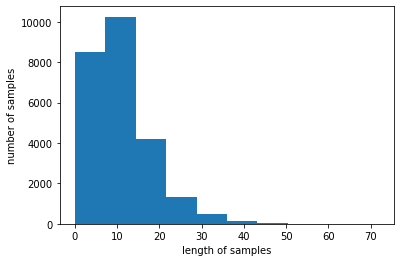

In [12]:
print('재료 최대 길이:',max(len(ingre) for ingre in tokenized_data))
print('재료 평균 길이:',sum(map(len,tokenized_data))/len(tokenized_data))
plt.hist([len(ingre) for ingre in tokenized_data])
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# training word2Vec(자연어 학습)

In [13]:
# !pip install gensim

In [14]:
# 토큰화 시킨 재료 데이터를 학습
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data,vector_size=100,window=5,min_count=5,workers=4,sg=0)

In [15]:
# 학습한 데이터를 기반으로 '우유'와 유사한 단어 출력
print(model.wv.most_similar("우유"))

[('생크림', 0.9057832956314087), ('버터', 0.8482955694198608), ('핫케이크', 0.8290813565254211), ('연유', 0.8258978724479675), ('노른자', 0.8183801174163818), ('무염', 0.8112474083900452), ('이스트', 0.8044947385787964), ('드라이', 0.7990207076072693), ('코코아', 0.7974997758865356), ('통밀', 0.79018235206604)]


# 영수증 이미지에서 글자 인식

In [16]:
# !pip install easyocr

In [17]:
import re
import easyocr
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import tensorflow as tf

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


청도미나리_200G(봉)
3490원
2000112250864
바지락살(100G)C
6000원
2000126116553
돼지삼견살캐나다산
13640원
2000142227271
오락비고탄력초미세모
21800원
2000124696726
[전단할인]
-10900원
과세물품
9909원
부가세
면세물품
23130원


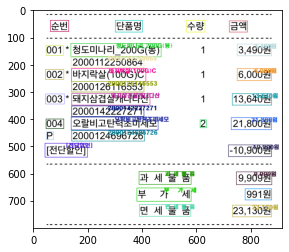

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


돼지삼견살캐나다산
10040원
2000141253920
면세물품
10040원
10040원


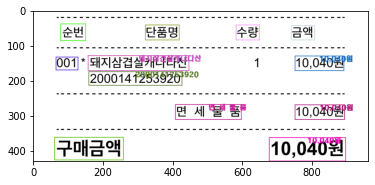

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


팔도일품삼선짜장
5980원
2000146787165
[전단할인]
~1800원
일품포크돼지앞다리
6560원
2000062020089
[구돈할인]
~2630원
일품포크돼지앞다리
6600원
2000062020089
[구돈할인]
~2640원
돼지삼견살캐나다산
10250원
2000141253920


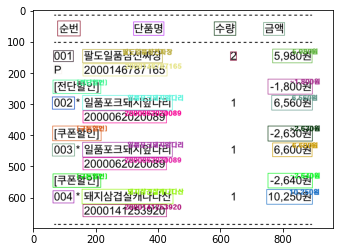

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


냉동돌돌말이삼견살
39980원
2000068718086
[구돈할인]
8000원
면세물품
31980원
총합계
39980원


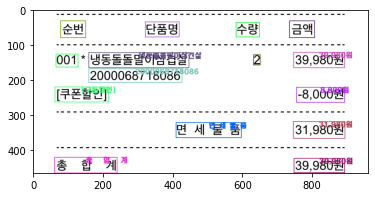

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


핸쓸현미밥
2790원
2000064105447
4무철가치권무
2000058667844
냉동돌돌말이삼견살
13990원
2000068718086
치즈품은닭갈비_500
3290원
2000127774998
알플구매10990원
돼지삼견살캐나다산
15080원
2000141253920
[구돈할인]
~4530원
잔스발부대찌개
6290원
2000128369584
알플구매8990원
과세물품
11245원
부가세
1125원
면세물품
25430원


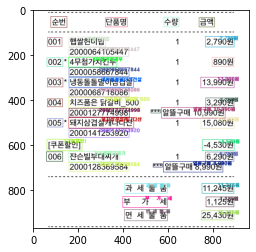

In [18]:
# 롯데 영수증 텍스트 인식
list_word = []
for a in range(1,6):
  reader = easyocr.Reader(['ko','en'])   # 영어, 한국어 언어 모델
  result = reader.readtext(f'C:/localRepository/recipes_project/paper/home_{a}.png')   # 이미지 텍스트화

  img    = cv2.imread(f'C:/localRepository/recipes_project/paper/home_{a}.png')

  img = Image.fromarray(img)
  font = ImageFont.truetype("C:/localRepository/recipes_project/HMKMRHD.TTF",20)
  draw = ImageDraw.Draw(img)

  np.random.seed(42)
  COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")

  for i in result :
      x = i[0][0][0]
      y = i[0][0][1]
      w = i[0][1][0] - i[0][0][0]
      h = i[0][2][1] - i[0][1][1]
      
      color_idx = random.randint(0,255)
      color = [int(c) for c in COLORS[color_idx]]
      draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)


      if len(str(i[1])) > 4 :    # 할인금액 단어 제거
          ex_text = str(i[1])    # 반복문 돌아가는 타겟 단어 위치
          ex_text = ex_text.replace(',','')   # 금액에 있는 ,(콤마) 제거
          ex_text = ex_text.replace(' ','')   # 공백 제거

          draw.text((int((x + x + w) / 2) , y-2),str(i[1]), font=font, fill=tuple(color),)
          print(ex_text)
          list_word.append(ex_text)

      else:
          pass

  plt.imshow(img)
  plt.show()

In [19]:
# 추출된 텍스트 확인
list_word

['청도미나리_200G(봉)',
 '3490원',
 '2000112250864',
 '바지락살(100G)C',
 '6000원',
 '2000126116553',
 '돼지삼견살캐나다산',
 '13640원',
 '2000142227271',
 '오락비고탄력초미세모',
 '21800원',
 '2000124696726',
 '[전단할인]',
 '-10900원',
 '과세물품',
 '9909원',
 '부가세',
 '면세물품',
 '23130원',
 '돼지삼견살캐나다산',
 '10040원',
 '2000141253920',
 '면세물품',
 '10040원',
 '10040원',
 '팔도일품삼선짜장',
 '5980원',
 '2000146787165',
 '[전단할인]',
 '~1800원',
 '일품포크돼지앞다리',
 '6560원',
 '2000062020089',
 '[구돈할인]',
 '~2630원',
 '일품포크돼지앞다리',
 '6600원',
 '2000062020089',
 '[구돈할인]',
 '~2640원',
 '돼지삼견살캐나다산',
 '10250원',
 '2000141253920',
 '냉동돌돌말이삼견살',
 '39980원',
 '2000068718086',
 '[구돈할인]',
 '8000원',
 '면세물품',
 '31980원',
 '총합계',
 '39980원',
 '핸쓸현미밥',
 '2790원',
 '2000064105447',
 '4무철가치권무',
 '2000058667844',
 '냉동돌돌말이삼견살',
 '13990원',
 '2000068718086',
 '치즈품은닭갈비_500',
 '3290원',
 '2000127774998',
 '알플구매10990원',
 '돼지삼견살캐나다산',
 '15080원',
 '2000141253920',
 '[구돈할인]',
 '~4530원',
 '잔스발부대찌개',
 '6290원',
 '2000128369584',
 '알플구매8990원',
 '과세물품',
 '11245원',
 '부가세',
 '1125원',
 '면세물품',
 '2543

In [34]:
# 추출된 텍스트에서 한국어만 추출
list_tmp = []

for j in range(len(list_word)):
    p = re.compile('[가-힣]+')
    m = p.match(list_word[j])
    m
    if m:
        m = m.group()
        list_tmp.append(m)
    else:
        pass
list_tmp

['청도미나리',
 '바지락살',
 '돼지삼견살캐나다산',
 '오락비고탄력초미세모',
 '과세물품',
 '부가세',
 '면세물품',
 '돼지삼견살캐나다산',
 '면세물품',
 '팔도일품삼선짜장',
 '일품포크돼지앞다리',
 '일품포크돼지앞다리',
 '돼지삼견살캐나다산',
 '냉동돌돌말이삼견살',
 '면세물품',
 '총합계',
 '핸쓸현미밥',
 '냉동돌돌말이삼견살',
 '치즈품은닭갈비',
 '알플구매',
 '돼지삼견살캐나다산',
 '잔스발부대찌개',
 '알플구매',
 '과세물품',
 '부가세',
 '면세물품']

In [35]:
# 리스트 안에 내용 중복 제거
list_tmp = list(set(list_tmp))
list_tmp

['부가세',
 '치즈품은닭갈비',
 '면세물품',
 '과세물품',
 '잔스발부대찌개',
 '팔도일품삼선짜장',
 '일품포크돼지앞다리',
 '냉동돌돌말이삼견살',
 '핸쓸현미밥',
 '청도미나리',
 '알플구매',
 '바지락살',
 '총합계',
 '오락비고탄력초미세모',
 '돼지삼견살캐나다산']

# 영수증에서 추출된 재료와 유사 단어 추출

In [47]:
# 불용어 정의 및 제거
product_stopword = ['부가세','면세물품','과세물품','알플구매','총합계']
stopwords_removed_sentence_p = [word for word in list_tmp if not word in product_stopword]
stopwords_removed_sentence_p

['치즈품은닭갈비',
 '잔스발부대찌개',
 '팔도일품삼선짜장',
 '일품포크돼지앞다리',
 '냉동돌돌말이삼견살',
 '핸쓸현미밥',
 '청도미나리',
 '바지락살',
 '오락비고탄력초미세모',
 '돼지삼견살캐나다산']

In [76]:
tokenized_products = []

for m in range(len(stopwords_removed_sentence_p)):
    removed = okt.morphs(stopwords_removed_sentence_p[m])
    tokenized_products.append(removed)
tokenized_products    

[['치즈', '품은', '닭갈비'],
 ['잔스발', '부대찌개'],
 ['팔도', '일품', '삼선짜장'],
 ['일품', '포크', '돼지', '앞다리'],
 ['냉동', '돌돌', '말', '이', '삼견', '살'],
 ['핸쓸', '현미', '밥'],
 ['청도', '미나리'],
 ['바지락', '살'],
 ['오락', '비고', '탄력', '초', '미세', '모'],
 ['돼지', '삼견', '살', '캐나다', '산']]

In [79]:
list_products = []

for h in range(len(tokenized_products)):
        for k in range(len(tokenized_products[h])):
            try:
                data = model.wv.most_similar(tokenized_products[h][k])
                result = {'original_words' : tokenized_products[h][k],
                            'smiliar_words' : data[0]}

                list_products.append(result)
            except:
                pass
            
print(list_products)

[{'original_words': '치즈', 'smiliar_words': ('슈', 0.7635844945907593)}, {'original_words': '닭갈비', 'smiliar_words': ('해파리', 0.9521470665931702)}, {'original_words': '부대찌개', 'smiliar_words': ('고기만', 0.9328819513320923)}, {'original_words': '돼지', 'smiliar_words': ('찌개', 0.7788151502609253)}, {'original_words': '앞다리', 'smiliar_words': ('목살', 0.821096658706665)}, {'original_words': '냉동', 'smiliar_words': ('쌀국수', 0.7521064877510071)}, {'original_words': '말', 'smiliar_words': ('명', 0.9536778926849365)}, {'original_words': '이', 'smiliar_words': ('반', 0.81910640001297)}, {'original_words': '살', 'smiliar_words': ('덩어리', 0.6433798670768738)}, {'original_words': '현미', 'smiliar_words': ('잡곡', 0.6692217588424683)}, {'original_words': '밥', 'smiliar_words': ('명란젓', 0.705617368221283)}, {'original_words': '미나리', 'smiliar_words': ('데친', 0.8159814476966858)}, {'original_words': '바지락', 'smiliar_words': ('조개', 0.7604948878288269)}, {'original_words': '살', 'smiliar_words': ('덩어리', 0.6433798670768738)}, {'ori

In [94]:
products =[]

for n in range(len(list_products)):
    list_main = list_products[n]['original_words']
    list_sub = list_products[n]['smiliar_words']
    if len(list_main) > 1:
        result = {'main_key' :list_main,
                'sub_key' : list_sub}
        products.append(result)
    else:
        pass
products

[{'main_key': '치즈', 'sub_key': ('슈', 0.7635844945907593)},
 {'main_key': '닭갈비', 'sub_key': ('해파리', 0.9521470665931702)},
 {'main_key': '부대찌개', 'sub_key': ('고기만', 0.9328819513320923)},
 {'main_key': '돼지', 'sub_key': ('찌개', 0.7788151502609253)},
 {'main_key': '앞다리', 'sub_key': ('목살', 0.821096658706665)},
 {'main_key': '냉동', 'sub_key': ('쌀국수', 0.7521064877510071)},
 {'main_key': '현미', 'sub_key': ('잡곡', 0.6692217588424683)},
 {'main_key': '미나리', 'sub_key': ('데친', 0.8159814476966858)},
 {'main_key': '바지락', 'sub_key': ('조개', 0.7604948878288269)},
 {'main_key': '돼지', 'sub_key': ('찌개', 0.7788151502609253)}]

In [98]:
# qtpy에서 사용하기 위한 key 저장
list_A = []

for A in range(len(products)):
    ori_A = products[A]['main_key']
    list_A.append(ori_A)

list_A = list(set(list_A))
list_A

['미나리', '부대찌개', '냉동', '돼지', '치즈', '바지락', '현미', '앞다리', '닭갈비']

# url 키워드 넣어서 링크 긁어오기

In [101]:
import requests
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


from selenium import webdriver
from bs4 import BeautifulSoup
from urllib.request import urlopen
import time
from selenium import webdriver

In [102]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-logging"])
wd = webdriver.Chrome('C:/localRepository/recipes_project/chromedriver.exe',options=options)

C:\Users\admin\AppData\Local\Temp\ipykernel_15844\1271265828.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('C:/localRepository/recipes_project/chromedriver.exe',options=options)


In [103]:
#해당 url로 이동

final_url = []

url = f'https://www.10000recipe.com/recipe/list.html?q={products[0].values()}&query=&order=date'
wd.get(url)

req = wd.page_source
soup = BeautifulSoup(req, "html.parser")

for e in range(0,4):
    link_recipes = soup.find_all("li", class_ = "common_sp_list_li")[e]
    link_recipes = link_recipes.find("a")["href"]
    print(link_recipes)

    final_url.append(f'https://www.10000recipe.com/{link_recipes}')

/recipe/6987325
/recipe/6986129
/recipe/6981044
/recipe/6979382


In [104]:
# 추출된 텍스트와 유사 단어를 이용해 검색과 해당 url 추출 가능한 것 확인 완료
final_url

['https://www.10000recipe.com//recipe/6987325',
 'https://www.10000recipe.com//recipe/6986129',
 'https://www.10000recipe.com//recipe/6981044',
 'https://www.10000recipe.com//recipe/6979382']

# QT Designer 이용한 시각화

In [39]:
# 커널 충돌 때문에 pyqt 파일 따로 생성
from csv import list_dialects
from os import link
from PyQt5.QtWidgets import *
from PyQt5 import uic
import sys
import requests
from bs4 import BeautifulSoup
import webbrowser
import os

recipes_ui = 'C:/localRepository/recipes_project/recipes.ui'


class MyWindow(QMainWindow):

    def __init__(self):
        QMainWindow.__init__(self, None)
        uic.loadUi(recipes_ui, self)

        self.pushButton.clicked.connect(self.pushButtonClicked)
        # self.lineEdit.textChanged.connect(self.line_changed)
        self.tblResult.itemSelectionChanged.connect(self.tblResultSelected)

        self.comboBox.addItems(list_A)
        self.comboBox.activated[str].connect(lambda :self.selectedComboItem(self.comboBox))
        self.pushButton.clicked.connect(self.selectedComboItem)

        self.show()

 
    def line_changed(self):
        pass
 
    def pushButtonClicked(self):

        url = f'https://www.10000recipe.com/recipe/list.html?q='
        keyword = self.comboBox.currentText()
        url_b = '&query=&order=date'
        
        result = requests.get(url + keyword + url_b)
        bs_obj = BeautifulSoup(result.content, 'html.parser')
        

        self.tblResult.setSelectionMode(QAbstractItemView.SingleSelection)
        self.tblResult.setColumnCount(2)
        self.tblResult.setRowCount(10) 
        self.tblResult.setHorizontalHeaderLabels(['레시피 이름', '레시피 링크'])
        self.tblResult.setColumnWidth(0,350)
        self.tblResult.setColumnWidth(1,250)
        self.tblResult.setEditTriggers(QAbstractItemView.NoEditTriggers) # read only

        ul = bs_obj.find('ul', class_='common_sp_list_ul ea4')
        lis = ul.find_all('li', class_='common_sp_list_li')

        list_title = []
        list_url = []

        for li in lis:
            title = li.find('div',class_= 'common_sp_caption_tit line2').get_text()
            list_title.append(title)

            url = li.find('div', class_='common_sp_thumb')
            url = url.find('a')['href']
            url = f'https://www.10000recipe.com/{url}'
            list_url.append(url)
  

        for i in range(len(list_title)):
            self.tblResult.setItem(i,0,QTableWidgetItem(list_title[i]))
            self.tblResult.setItem(i,1,QTableWidgetItem(list_url[i]))

    def tblResultSelected(self) -> None:
        selected = self.tblResult.currentRow() 
        link = self.tblResult.item(selected, 1).text()
        webbrowser.open(link)


    ### 콤보박스 관련 함수
    def selectedComboItem(self,text):
        # print(self.comboBox.currentText())
        pass


if __name__ == '__main__':

    app = QApplication(sys.argv)
    Dialog = MyWindow()
    Dialog.show()
    app.exec_()

: 

: 